# L5: MCTS and AgentQ

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [1]:
import os
import numpy as np
import seaborn as sns
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from IPython.display import HTML
from gridworld import MCTSGridWrapper, dfs

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>
</div>

## MCTS Example (Gridworld)

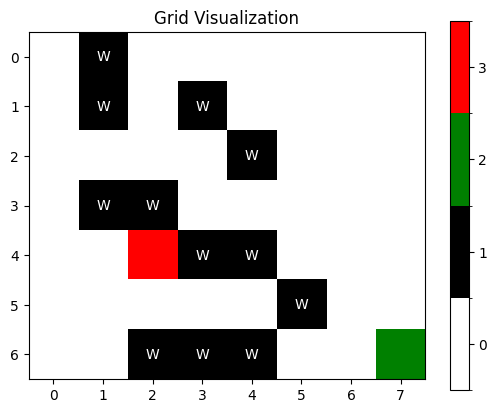

In [2]:
# 0: Possible paths  1: Obstacles  2: Starting position  3: End Position
grid = [
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 3, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 2],
]

arr = np.array(grid)
cmap = colors.ListedColormap(["white", "black", "green", "red"])
boundaries = [-0.5, 0.5, 1.5, 2.5, 3.5]
norm = colors.BoundaryNorm(boundaries, cmap.N)
plt.imshow(arr, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(ticks=[0, 1, 2, 3])
plt.title("Grid Visualization")

rows, cols = arr.shape
for i in range(rows):
    for j in range(cols):
        if arr[i, j] == 1:
            plt.text(j, i, 'W', ha='center', va='center', color='white')
            
plt.show()

In [3]:
iter_step = 100 
n_iter = 1000    # Total number of MCTS iterations
explore_low = 1.0  # Minimum exploration weight
explore_high = 3.0  # Maximum exploration weight
explore_n = 5     # Number of different exploration weights to test
explore_step = (explore_high - explore_low) / explore_n

all_results = []
exploration_weights = list(np.arange(explore_low, explore_high, explore_step))

for weight in exploration_weights:
    mcts = MCTSGridWrapper(grid, n_iterations=n_iter, exploration_weight=weight, save_interval=iter_step)
    results = mcts()
    all_results.append(results)

In [4]:
from mcts_animation import compare_exploration_weights

animation = compare_exploration_weights(all_results,
                                        grid,
                                        exploration_weights,
                                        animate=True)
display(animation)

In [5]:
import os
from helper import get_openai_api_key

os.environ["OPENAI_API_KEY"] = get_openai_api_key()
os.environ["OPENAI_MODEL"] = "gpt-4o-mini"

In [6]:
%cd agent-q-clone
!python agentq/config/config.py

/home/jovyan/work/L5/agent-q-clone
Created log folder at: /home/jovyan/work/L5/agent-q-clone/agentq/log_files
Created temp folder at: /home/jovyan/work/L5/agent-q-clone/agentq/temp


In [ ]:
from agentq.core.mcts.browser_mcts import main
result = await main(objective = "Find a course on RAG in deeplearning.ai ",
                    eval_mode = True)

Starting MCTS
Starting in eval mode True
Browser started and ready
[DEBUG] Starting main function
[DEBUG] Objective set: Find a course on RAG in deeplearning.ai 
[DEBUG] BrowserWorldModel initialized with objective: Find a course on RAG in deeplearning.ai 
[DEBUG] BrowserMCTSSearchConfig initialized
[DEBUG] BrowserMCTSWrapper initialized with objective: Find a course on RAG in deeplearning.ai 
[DEBUG] Running MCTS wrapper
[DEBUG] Starting MCTS search
[DEBUG] GOING TO INIT STATE HOMEPAGE
[DEBUG] Navigation successful on attempt 1
[DEBUG] Got current DOM (length: 3)
[DEBUG] Got current URL: Current Page: https://www.google.com/, Title: Google
[DEBUG] Initial state created - URL: Current Page: https://www.google.com/, Title: Google
-----iter: 0----
Selected Node
Expanding node
[DEBUG] Getting actions for current state
[DEBUG] Number of proposed tasks: 3
[INFO] Sorting task via Critic now...
[DEBUG] Sorted actions.
[DEBUG] Number of sorted actions: 3
Got possible actions
[BrowserAction(tas

[DEBUG] Entered text and clicked element
[DEBUG] Navigation successful on attempt 1
[DEBUG] Got current DOM (length: 3)
[DEBUG] Got current URL: Current Page: https://www.google.com/search?ie=ISO-8859-1&hl=en&source=hp&biw=&bih=&q=RAG+course+site%3Adeeplearning.ai&iflsig=ACkRmUkAAAAAZ__vd8GhUwo1BnXywWqss3dXOjgxc26N&gbv=2&oq=RAG+course+site%3Adeeplearning.ai&gs_l=heirloom-hp.12...1714.1800.0.3954.31.2.0.0.0..., Title: RAG course site:deeplearning.ai - Google Search
[DEBUG] After action execution - New URL: Current Page: https://www.google.com/search?ie=ISO-8859-1&hl=en&source=hp&biw=&bih=&q=RAG+course+site%3Adeeplearning.ai&iflsig=ACkRmUkAAAAAZ__vd8GhUwo1BnXywWqss3dXOjgxc26N&gbv=2&oq=RAG+course+site%3Adeeplearning.ai&gs_l=heirloom-hp.12...1714.1800.0.3954.31.2.0.0.0..., Title: RAG course site:deeplearning.ai - Google Search
[DEBUG] New state after step - URL: Current Page: https://www.google.com/search?ie=ISO-8859-1&hl=en&source=hp&biw=&bih=&q=RAG+course+site%3Adeeplearning.ai&iflsig=AC

In [ ]:
%cd ..

from plotTree import plot_tree, dfs_browser_nodes

urls = {}
messages = {}
actions = {}
weights = {}
critic_responses = {}
AL = {}
EL = []
Q = {}
objectives = {}
rewards = {}
is_terminals = {}
completed_tasks = {}

dfs_browser_nodes(result.tree_state, urls, messages, actions, weights, critic_responses, AL, EL, Q, objectives, rewards, is_terminals, completed_tasks)

In [ ]:
cur_mx = 0
for i in EL:
    cur_mx = max(cur_mx, i[0])
    cur_mx = max(cur_mx, i[1])
    
# Plot the enhanced tree
fig = plot_tree(cur_mx+1, urls, messages,
                actions, weights, critic_responses, Q, EL)
fig.show()